In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Getting To Know Your Surface Mesh
============================================

Surface level simulations in TVB use a triangular mesh surface to represent the 
folded cortical surface, similar triangular mesh surfaces are used to represent 
the boundaries between brain and skull, skull and skin, and skin and air, that 
are used in the calculation of EEG and MEG forward solutions. This tutorial 
covers a few basic ways of looking at the properties of these surfaces.

One of the things we'll be looking for is how well regularised the mesh is -- **a
well regularised a mesh has a narrow distribution of edge lengths and triangle 
areas**. For most uses in TVB, it is important to have a well regularised mesh. 

Setup
-----

We'll be working under the LIBRARY PROFILE and only import the 'surfaces' datatype:

In [2]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

In [11]:
import tvb.datatypes.cortex as cort

Load the Default Cortical Surface
----------------------------------

**Note:** *The Cortex requires a LocalConnectivity to be defined over the entire surface, 
the configure() method below will calculate this LocalConnectivity if it hasn't been specified before. This method may take a minute or so... For the case of the default cortex, a LocalConnectivity has already been loaded*

In [16]:
cortex = cort.Cortex(load_default=True)
cortex.configure()

Take A Look At Its Properties
------------------------------

As our surface is one of TVB's Datatypes, the first thing we can do is take a look at the summary information:

In [22]:
cortex.summary_info

{'Edge lengths, longest (mm)': 7.756718537821133,
 'Edge lengths, mean (mm)': 3.9760529288677224,
 'Edge lengths, shortest (mm)': 0.6638075672007665,
 'Has two hemispheres': False,
 'Number of edges': 49140,
 'Number of regions': 76,
 'Number of triangles': 32760,
 'Number of vertices': 16384,
 'Region area, maximum (mm:math:`^2`)': 9333.3936550857397,
 'Region area, mean (mm:math:`^2`)': 3038.5124452158379,
 'Region area, minimum (mm:math:`^2`)': 540.90370450261071,
 'Surface type': 'Cortex'}

We can see a number of basic properties of the mesh here, such as the number of vertices,
edges and triangles making up the surface. A summary of the edge lengths is also included,
this is useful to know what scale of features, eg LocalConnectivity, we can expect to be 
able to represent on this surface. As a Cortex also has a large-scale Connectivity 
associated with it we see some "Region" information as well, here it is TVB's default 74
region connectivity matrix. As we can see, this Connectivity parcellates the cortex into 
regions with a fairly broad range of sizes...

Looking in more detail, we can plot the distributions of things like edge lengths and 
triangle areas to see in more detail whether the mesh is well regularised...

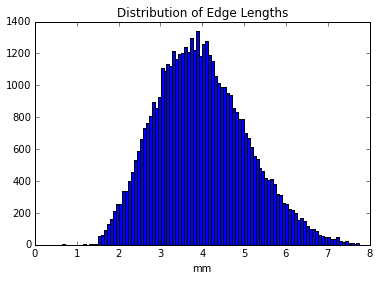

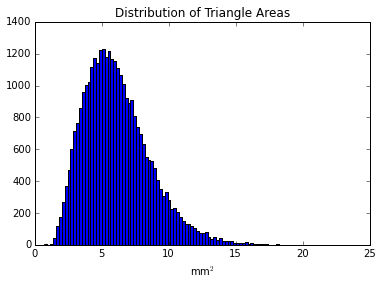

In [23]:
figure()
hist(cortex.edge_lengths, bins=100)
title("Distribution of Edge Lengths")
xlabel("mm")

figure()
hist(cortex.triangle_areas, bins=100)
title("Distribution of Triangle Areas")
xlabel("mm$^2$")

Loading a non-default surface 
------------------------------
Let's us have a look at a second cortical surface. This dataset is also stored in tvb_data, but you can give the absolute path to where you have your own data.

In [29]:
cortex_80k = cort.Cortex.from_file("cortex_80k/surface_80k.zip", region_mapping_file="cortex_80k/region_mapping_80.txt",local_connectivity_file="cortex_80k/local_connectivity_80k.mat")

An alternative way to do this impplies a few more steps and later on we'll se why it is useful ...

In [32]:
cortex_80k.configure()

In [33]:
cortex_80k.summary_info

{'Edge lengths, longest (mm)': 3.6711898899404525,
 'Edge lengths, mean (mm)': 1.5265444483771284,
 'Edge lengths, shortest (mm)': 0.4107428368237218,
 'Has two hemispheres': False,
 'Number of edges': 245760,
 'Number of regions': 80,
 'Number of triangles': 163840,
 'Number of vertices': 81924,
 'Region area, maximum (mm:math:`^2`)': 8342.4532265866837,
 'Region area, mean (mm:math:`^2`)': 2066.5942009088531,
 'Region area, minimum (mm:math:`^2`)': 232.34961551601401,
 'Surface type': 'Cortex'}

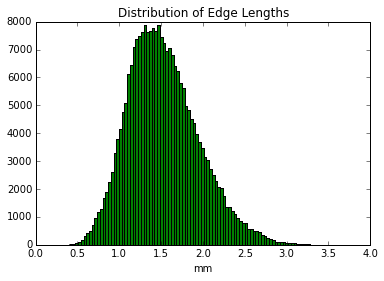

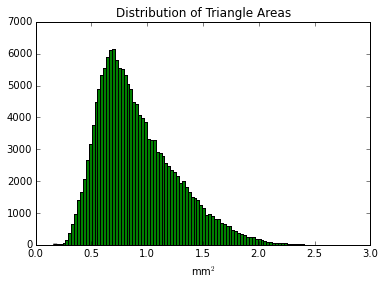

In [34]:
figure()
hist(cortex_80k.edge_lengths, bins=100, facecolor='green')
title("Distribution of Edge Lengths")
xlabel("mm")

figure()
hist(cortex_80k.triangle_areas, bins=100, facecolor='green')
title("Distribution of Triangle Areas")
xlabel("mm$^2$")

If you want to change the region mapping you can use the following syntax:

In [39]:
import tvb.datatypes.region_mapping as region_mapping
my_rm = region_mapping.RegionMapping.from_file('cortex_80k/region_mapping_80.txt')
cortex_80k.region_mapping_data = my_rm

A similar syntax is valid if you have a .mat file with a different LocalConnectivity.

That's All Folks... so, what's next?
=====================================

We've covered some basic ways of checking the quality and other properties of
a mesh surface. When loading a new surface into TVB, these represent the sorts
of things you should be checking to make sure your surface will work well with
TVB.